# 中国五个城市PM 2.5数据分析

## 简介

PM2.5的检测数值通常包含在环境部门和公司的空气质量报告中。 PM2.5是指大气颗粒物（PM），其直径小于或等于2.5微米。在环境科学中，特指悬浮在空气中的固体颗粒或液滴，是空气污染的主要来源之一。


## 项目完成指南


本项目中的数据分析流程和分析中使用的函数已经给出，如果你对Python不是很熟悉，通过前面课程对数据类型和函数的简单掌握，你也可以完成本项目，请不要担心！请将你的重心放到观察数据、提出问题和解答问题上。

> **小贴士**: 像这样的引用部分旨在为学员提供实用指导，帮助学员了解并使用 Jupyter notebook


## 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。但是在你开始查看数据前，请先思考几个你需要理解的关于PM2.5的问题，例如，如果你是一名环境工作者，你会想要获得什么类型的信息来了解不同城市的环境情况？如果你是一名生活在这个城市的普通人，你可以思考PM 2.5的变化会有什么样的周期性规律？选择什么时段出行空气质量最佳？




## 观察数据

本数据包含有中国五个城市(北京、上海、成都、广州、沈阳)从2010/1/1-2015/12/31的空气和气象数据。数据中的缺失值被标记为NaN。数据列名的含义如下：

```
No: 行号
year: 年份
month: 月份
day: 日期
hour: 小时
season: 季节
PM: PM2.5浓度 (ug/m^3)
DEWP: 露点 (摄氏温度) 指在固定气压之下，空气中所含的气态水达到饱和而凝结成液态水所需要降至的温度。
TEMP: Temperature (摄氏温度)
HUMI: 湿度 (%)
PRES: 气压 (hPa)
cbwd: 组合风向
Iws: 累计风速 (m/s)
precipitation: 降水量/时 (mm)
Iprec: 累计降水量 (mm)
```

其中与PM2.5浓度相关的数据包含有多列，其中`PM_US Post` 的数据来源是[US Department of State Air Quality Monitoring Program](http://www.stateair.net/web/post/1/4.html)。其他PM相关的数据来源于中国生态环境部在五个城市设置的不同站点，比如`PM_Xuhui`位于上海市徐汇区，`PM_Dongsihuan`位于北京市的东四环。

本项目中的数据可以从[Kaggle网站](https://www.kaggle.com/uciml/pm25-data-for-five-chinese-cities)上下载到，该数据也被收录于[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/PM2.5+Data+of+Five+Chinese+Cities#)。

由于项目难度设定的问题，在后面的分析中我们暂时没有对气象数据的处理和分析，如果同学感兴趣的话可以自行探索。如果你有足够的能力，我们也欢迎你不采用项目模板中的代码，对数据自行进行分析~


**问题 1**：至少写下一个你感兴趣的问题，请确保这些问题能够由现有的数据进行回答。

（问题示例：1. 2012年-2015年上海市PM 2.5的数据在不同的月份有什么变化趋势？2. 哪个城市的PM 2.5的含量较低？）

**答案**：2013年-2015年广州市PM 2.5的数据在不同的月份有什么变化趋势？

（考察点：数据分析过程 - 提出问题）


> **小贴士**: 双击上框(Markdown Cell)，文本就会发生变化，所有格式都会被清除，以便你编辑该文本块。该文本块是用 [Markdown](http://daringfireball.net/projects/markdown/syntax)编写的，该语言使用纯文本语法，能用页眉、链接、斜体等来规范文本格式。在纳米学位课程中，你也会用到 Markdown。编辑后，可使用 **Shift** + **Enter** 或 **Shift** + **Return** 运行上该框，使其呈现出编辑好的文本格式。Jupyter Notebook中有两种框，一种是Markdown Cell, 用来书写文本，另一种是Code cell,用来书写代码。我们稍后会用到。

## 数据评估

我们已经在前面的练习题中对数据进行了评估和清理。所以在此处我们不再重复这个步骤，对所有数据的清理步骤已经有现成的代码，将会在下面的“数据整理”部分完成。

首先我们先运行下面的代码单元格来加载你将在分析中使用的所有数据包和函数。这些都是在数据分析中常用的第三方库，我们会在后面的正式课程中进行更加细致的教学。

> **小贴士**: 下面是代码框(code cell). 运行代码框的方法与编辑上方的 Markdown 框的格式类似，你只需点击代码框，按下键盘快捷键 **Shift** + **Enter** 或 **Shift** + **Return** ，或者你也可先选择代码框，然后点击工具栏的 **运行** 按钮来运行代码。运行代码框时，相应单元左侧的信息会出现星号，即 `In [*]:`，若代码执行完毕，星号则会变为某个数字，如 `In [1]`。如果代码运行后有输出结果，输出将会以 `Out [1]:` 的形式出现，其中的数字将与 "In" 中的数字相对应。如果代码运行后没有输出结果，则不会有`Out [1]`出现。

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

from helper_functions import filter_data, reading_stats, univariate_plot

## 数据整理

通过前面的练习，你已使用单个数据集完成了一些探索，是时候更进一步，将所有数据整理到一个文件中并看看你能发现什么趋势。通过describe函数对数据进行查看，我们可以看出几个PM 2.5观察站的统计数据都很接近，经过进一步的分析，我们会能够发现这几个观测站的数据存在有很强的相关关系（**本项目中并未包含，但你可以通过学习后面的统计学课程，自己来完成此部分**）。

因为五个数据文件中都包含`PM_US Post`一列，并且该列的缺失值相对于其他列缺失值较小，因此在下面的分析中我们仅保留该列数据作为PM 2.5的关键数据。在下面的代码中我们也预先对所有城市的season进行了转换，并为数据添加了一个`city`列，便于对不同城市进行对比分析。

其他的气象数据我们暂时先不考虑，如果同学感兴趣的话可以自行分析。



In [3]:
files = ['BeijingPM20100101_20151231.csv',
       'ChengduPM20100101_20151231.csv',
       'GuangzhouPM20100101_20151231.csv',
       'ShanghaiPM20100101_20151231.csv',
       'ShenyangPM20100101_20151231.csv']

out_columns = ['No', 'year', 'month', 'day', 'hour', 'season', 'PM_US Post']

In [4]:
# create a void dataframe
df_all_cities = pd.DataFrame()

In [5]:
# iterate to write diffrent files
for inx, val in enumerate(files):
    df = pd.read_csv(val)
    df = df[out_columns]
    # create a city column
    df['city'] = val.split('P')[0]
    # map season 
    df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3:'Autumn', 4: 'Winter'})
    # append each file and merge all files into one
    df_all_cities = df_all_cities.append(df)

In [6]:
# replace the space in variable names with '_'
df_all_cities.columns = [c.replace(' ', '_') for c in df_all_cities.columns]

我们来简单查看一下处理后的数据，观察数据是否符合我们的要求：

In [7]:
df_all_cities.head()

,No,year,month,day,hour,season,PM_US_Post,city
0,1,2010,1,1,0,Winter,NaN,Beijing
1,2,2010,1,1,1,Winter,NaN,Beijing
2,3,2010,1,1,2,Winter,NaN,Beijing
3,4,2010,1,1,3,Winter,NaN,Beijing
4,5,2010,1,1,4,Winter,NaN,Beijing


## 数据筛选

接下来我们将会对你在前面提出的问题进行更进一步的思考。

`df_all_cities`是我们建立的一个包含所有数据的Pandas Dataframe，考虑到我们的分析目标，我们可能会需要提取部分数据来针对我们感兴趣的具体问题进行分析。为了方便大家对数据进行探索，我们定义了一个`reading_stats`的函数，通过输入不同的条件(conditions),该函数可以帮助我们筛选出这部分的数据。

在使用中，我们只需要调用`reading_stats`即可，我们在这个函数中调用了`filter_data`函数，因此并不需要我们直接操作`filter_data`函数。下面是对于该函数的一些提示。

`reading_stats`函数中包含有3个参数：

1. 第一个参数（必须）：需要被加载的 dataframe，数据将从这里开始分析。
2. 第二个参数（可选）：数据过滤器，可以根据一系列输入的条件(conditions)来过滤将要被分析的数据点。过滤器应作为一系列条件提供，每个条件之间使用逗号进行分割，并在外侧使用`""`将其定义为字符串格式，所有的条件使用`[]`包裹。每个单独的条件应该为包含三个元素的一个字符串：`'<field> <op> <value>'`（元素与元素之间需要有一个空格字符来作为间隔），`<op>`可以使用以下任意一个运算符：>、<、>=、<=、==、!=。数据点必须满足所有条件才能计算在内。例如，["city == 'Beijing'", "season == 'Spring'"] 仅保留北京市，季节为春天的数据。在第一个条件中, `<field>`是city，`<op>`是 ==, `<value>`是'Beijing',因为北京为字符串，所以加了单引号，它们三个元素之间分别添加一个空格。最后，这个条件需要使用双引号引用起来。这个例子中使用了两个条件，条件与条件之间使用逗号进行分割，这两个条件最后被放在`[]`之中。
3. 第三个参数（可选）：详细数据，该参数决定我们是否打印被选择的数据的详细统计信息。如果verbose = True，会自动打印数据的条数，以及四分位点，并绘制箱线图。如果verbose = False, 则只会返回筛选后的dataframe，不进行打印。

下面我们会使用上海市2012年-2015年的数据进行举例，探索数据中的一些问题。要获取这部分的数据，我们可以使用下面的函数来实现。

There are 35064 readings (13.34%) matching the filter criteria.
The average readings of PM 2.5 is 52.88 ug/m^3.
The median readings of PM 2.5 is 41.00 ug/m^3.
25% of readings of PM 2.5 are smaller than 26.00 ug/m^3.
25% of readings of PM 2.5 are larger than 67.00 ug/m^3.


C:\Users\wendy\pm2.5\helper_functions.py:70: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  pm_qtiles = data['PM_US_Post'].quantile([.25, .5, .75]).as_matrix()


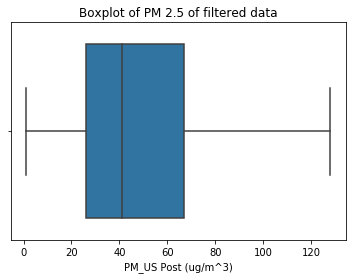

In [8]:
df_test = reading_stats(df_all_cities, ["city == 'Shanghai'", "year >= 2012"])

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 8 columns):
No            35064 non-null int64
year          35064 non-null int64
month         35064 non-null int64
day           35064 non-null int64
hour          35064 non-null int64
season        35064 non-null object
PM_US_Post    33962 non-null float64
city          35064 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 2.1+ MB


从这里的分析我们可以看出，上海市2012-2015年的PM2.5数据有35064条记录，其中PM_US Post站点的记录有33962条，缺失的数量并不是很大。因为Pandas（我们使用的第三方库）在计算统计数字的时候，会自动排除掉缺失的数值，因此在这里我们没有对缺失值进行任何处理。

上海市在2012-2015年期间PM 2.5的值主要分布在0-125 ug/m^3这个区间，平均数值为52.88 ug/m^3，中位数为41.00 ug/m^3，有25%的读数小于26.00 ug/m^3，有25%的读数大于67.00 ug/m^3。

下面请你对你所感兴趣的问题进行分析，并回答下面的问题：（提示: 你需要对前面提出的两个问题都进行思考。）

**问题2a**: 要回答你前面的提出的问题，你需要筛选符合哪些条件的数据？请具体说明。

**答案**：需要获取city的名称， 以及符合年份的数据筛选，还有PM2.5具体数据。

**问题2b**：请使用上面给出的`reading_stats`函数来调用你所需要的数据，请在下面填写合适的条件（conditions）。提示：对应此函数的第二个参数。

**答案**："city == 'Guangzhou'", "year >= 2013"

（考察点：数据分析中的逻辑思维）

There are 26280 readings (10.00%) matching the filter criteria.
The average readings of PM 2.5 is 48.20 ug/m^3.
The median readings of PM 2.5 is 41.00 ug/m^3.
25% of readings of PM 2.5 are smaller than 23.00 ug/m^3.
25% of readings of PM 2.5 are larger than 64.00 ug/m^3.


C:\Users\wendy\pm2.5\helper_functions.py:70: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  pm_qtiles = data['PM_US_Post'].quantile([.25, .5, .75]).as_matrix()


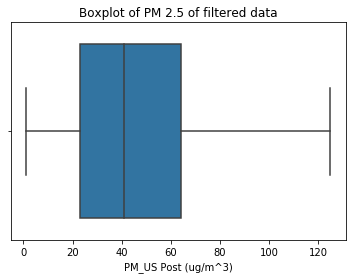

In [10]:
# TO DO: First question
df1 = reading_stats(df_all_cities,["city == 'Guangzhou'", "year >= 2013"] )

**问题2c**：你获取的数据分别包含多少条记录，统计特征如何？

**答案**：广州市2013-2015年的PM2.5数据有26280条记录，均值为48.20 ug/m^3，中位数（Q2）为41.00 ug/m^3，Q1为23.00 ug/m^3，Q3为64.00 ug/m^3。

（考察点：统计基础）

## 数据探索性分析和可视化

得到了想要的数据之后，接下来你可以对数据进行探索性分析和可视化了，并报告你的发现！在这部分我们同样为你提供了一个函数`univariate_plot`来对PM 2.5的观测平均值制作柱形图的可视化，下面是关于本函数使用方法的一些提示：

1. 第一个参数（必须）：筛选后数据的 dataframe，将从这里分析数据。
2. 第二个参数（必须）：数据分析进行的维度，在这里可以填入一个column_name，比如'season', 'month', 'hour'等，对数据进行分组分析。
3. 第三个参数（可选）：可视化中柱形的颜色，默认为蓝色，你也可以选择你喜爱的其他颜色，比如red，blue，green等。但是请尽量保证一份可视化报告中图表颜色的一致和整洁性。



我们以上海市2012年之后不同月份的PM 2.5的观测平均值为例，使用`univariate_plot`函数绘制了可视化：

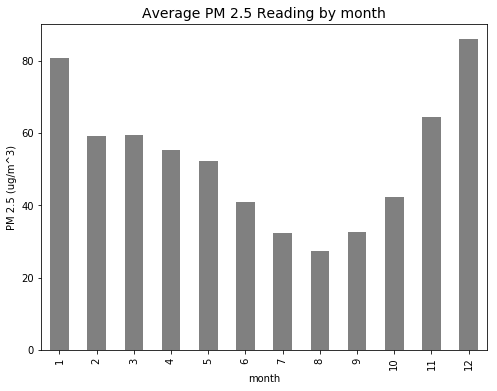

In [11]:
univariate_plot(df_test, 'month', 'grey')

从本可视化中我们可以看出在较温暖的月份（6-10月）空气中的PM 2.5含量较低，而较寒冷的月份，比如（11-1月）空气中的PM 2.5含量较高。

接下来，你可以对你提出的问题进行探索了！请使用上面的函数探索一些不同的变量，并记录你发现的一些趋势。如果你想用其他方式或多个方式探索数据集，可自行创建更多的单元格。

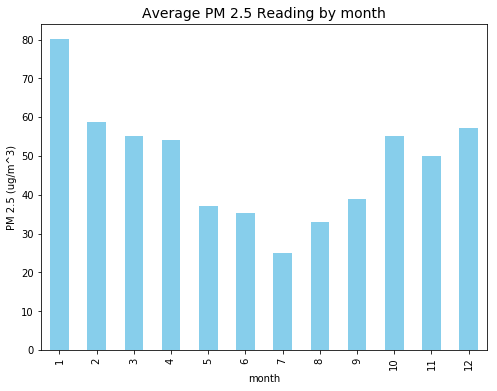

In [12]:
# TO DO: 
# please use univariate_plot to visualize your data 
univariate_plot(df1 , 'month', '#87CEEB')

（考察点：如何调用函数）

**问题 3**：上述可视化有何有趣的趋势？是否能够回答你的问题？（如果不能，请说明你需要什么信息来帮助你来回答问题）

**答案**：从本可视化中可看出在广东较热月份（4-9月）空气中的PM 2.5含量较低，而在春季和接近秋冬季月份如（10-4月）空气中的PM 2.5含量较高，其中1月份PM2.5含量最高。

（考察点：数据分析过程 - 可视化的解读，得出结论）

## 结论

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据到探索数据。通常，在数据分析过程的这个点，你可能想要通过执行统计检验或将数据拟合到一个模型进行预测，来对我们的数据得出结论。还有很多可以对数据执行的潜在分析，但仅靠这里所给的有限代码无法完成。除了结果轴上的PM_US Post的平均值，你还可以观察具有影响的其他特征，如其他站点的PM2.5读数,各种气象数据。我们还未研究过气象数据与PM2.5之间的相关关系。如果你对数据科学方法感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析相关的技能！

**问题 4**：根据目前你对数据分析的了解，请思考一个可以应用数据科学技术的话题或兴趣领域。你希望使用什么样的数据，来得到什么样的信息？

**答案**: 希望可以通过爬虫获取网上主流媒体平台的话题热度数据，分析出年度新生代流程小生小花排名。

（考察点：数据分析师解决的问题）

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件 File”菜单，前往“下载为 Download As”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。

恭喜你完成了这个项目！现在可以提交你的项目了。请按照上面的方法提供jupyter Notebook (.ipynb) 文件和 HTML (.html) 文件，将这两个文件打包成zip文件在后面的项目提交入口进行项目提交。